<a href="https://colab.research.google.com/github/sangwon0120/Arom_AI/blob/main/%EC%95%84%EB%A1%ACAI_3%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C_%EB%B3%80%EC%83%81%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 강의 자료
> https://www.inflearn.com/course/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/dashboard
> https://velog.io/@changhtun1/python-%EC%84%A0%ED%98%95-%ED%9A%8C%EA%B7%80-%EC%9D%B4%EB%A1%A0-%EB%B0%8F-%EC%8B%A4%EC%8A%B5

# **선형회귀**

0. 다음 코드를 입력하세요. 그리고 `insurance.csv` 데이터를 불러와 위에서부터 5개 행을 출력하세요.
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
```

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

insurance=pd.read_csv('./drive/MyDrive/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. `age`와 `charge` 사이의 선형 모델을 생성하기 위해서는 두 데이터 사이의 선형성을 확인해야합니다. 산점도를 이용해 두 값에서 선형성이 발견되는지 확인하세요.
- `figsize`는 (10, 5)로 설정해주세요.
- X축을 ‘`age`’, Y축을 ‘`charges`’로 설정해주세요.

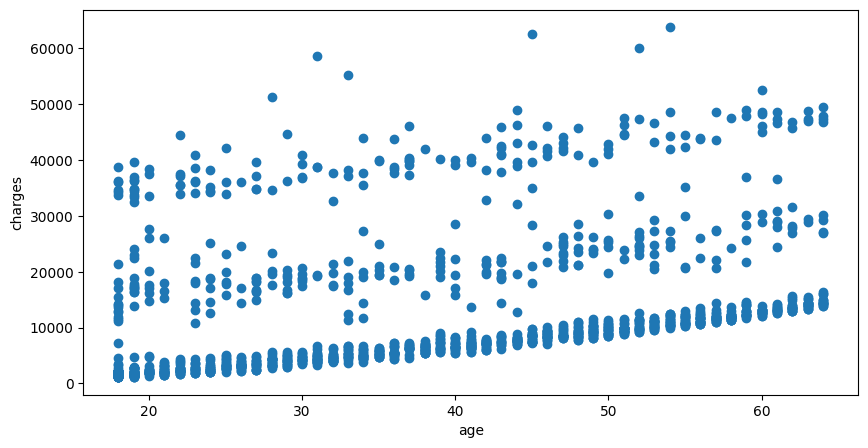

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(insurance['age'], insurance['charges'])
#plt.rcParams['figure.figsize']=[10, 4]
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

2. 다음 코드를 이어서 작성해주세요.
```python
x = np.array(data['age'])
y = np.array(data['charges'])
```
패키지를 `import`한 뒤 `LinearRegression`을 불러오고 `.fit()`을 이용해 데이터에 학습시켜야 합니다. 이때 `.fit()`에 입력되는 데이터는 2차원 array여야 합니다.  `reshape()`을 이용해 차원을 맞춰준 후 `.fit()`을 사용해주세요.

In [ ]:
from sklearn.linear_model import LinearRegression

data = insurance
lin_reg = LinearRegression()
x = np.array(data['age'])
y = np.array(data['charges'])
x = x.reshape(-1,1)
y = y.reshape(-1,1)
lin_reg.fit(x,y)

LinearRegression()

3. 선형회귀 모델 결과를 출력하세요. 절편과 계수를 출력하시면 됩니다.

In [ ]:
print(lin_reg.intercept_,lin_reg.coef_)

[3165.88500606] [[257.72261867]]


4. 새로운 데이터 샘플을 선형 회귀 모델에 입력한 뒤 나이에 따른 의료비용을 예측해보고 싶습니다. 나이는 19세와 64세이고,` x_new`를 어떤 메서드에 넣어서 `y_hat`(예측한 의료비용)을 구하고 싶습니다. 이때 어떤 메서드가 아래 코드에 들어가야하는지 작성하세요. 코드는 전부 이어서 따라 쳐주세요.
```python
x_new = [[19],[64]]
y_hat = ???
```

In [ ]:
x_new = [[19],[64]]
y_hat = lin_reg.predict(x_new)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]


5. 산점도 위에 회귀선을 그어 선형 모델이 데이터를 얼마나 잘 설명할 수 있는지 시각화 해보세요.
- `x_new`,` y_hat`에 대한 회귀선 색상은 “`-r`”으로 해주세요. `label`명은 Prediction으로 해주세요.
- 기존의 x, y에 대한 건 “`b.`”으로 해주세요. label명은 Actual로 해주세요.
- 범례는 `upper right`에 생성해주세요.

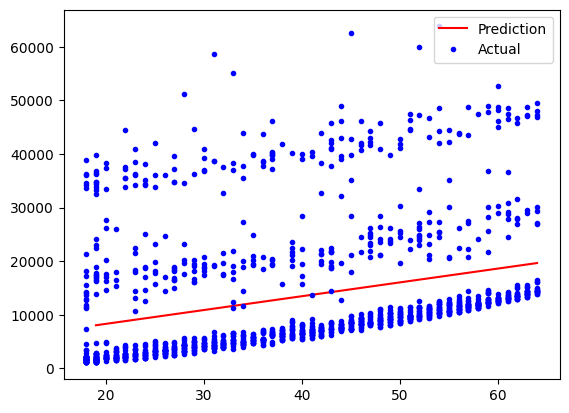

In [ ]:
plt.plot(x_new,y_hat,"r-",label='Prediction')
plt.plot(x,y,"b.",label='Actual')
plt.legend(loc='upper right')
plt.show()

# **다항회귀**


0. 다음 코드를 입력하세요. 그리고 cereal.csv를 불러와 info, describe를 확인하세요.
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
```

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

cereal = pd.read_csv('./drive/MyDrive/cereal.csv')
cereal.info()
cereal.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


1. 이번엔 분석에 필요한 데이터만 추출하기 위해 전처리를 진행하도록 하겠습니다. 데이터 타입이 `object`인 변수는 분석에서 제외해주세요. 설탕함유량(sugar)에 따른 영양등급평가(rating)를 다항 회귀분석으로 예측하겠습니다. 따라서 설탕 함유량이 0이상인 데이터만 추출하는 코드를 추가해주세요.

In [ ]:
cereal = cereal.select_dtypes(exclude=['object'])
cereal=cereal[cereal.sugars>=0]

2. 먼저 `sugars` 변수와 `rating` 변수 사이의 관계를 확인하겠습니다. 이를 위해 `cereal2`라는 변수에 두 변수를 추출한 후, `sugars` 기준으로 데이터를 정렬하고 인덱스를 재설정하겠습니다. 그 후 `sugars`를 x축으로, `rating`을 y축으로 하여 산점도를 그려 시각화 하세요.

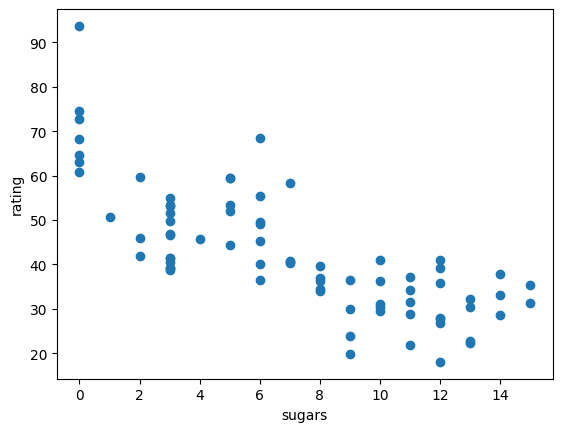

In [ ]:
cereal2=cereal[['sugars','rating']]
cereal2=cereal2.sort_values('sugars')
plt.scatter(cereal2['sugars'],cereal2['rating'])
plt.xlabel('sugars')
plt.ylabel('rating')
plt.show()

3. `sugars`를 X로 설정, `rating`을 y 로 설정하여 `train_test_split`을 이용해 학습데이터와 평가데이터를 7:3 비율로 분할하세요

In [ ]:
x=np.array(cereal2['sugars'])
y=np.array(cereal2['rating'])

x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.3)

4. `PolynomialFeatures`로 2차 다항식을 생성한 뒤 `poly_reg`라는 변수에 담아주시고, `X_train` 데이터는 `.reshape(-1,1)`로 변환시켜준 후 `fit_transform()` 메서드로 `X_poly` 데이터를 생성해주세요. 그 후 다항 회귀 분석을 위해 `reg`라는 변수로 `LinearRegression`을 불러오신 후 `fit()`을 활용해 변환된 데이터 `X_poly`와 타깃 변수 `y_train`을 입력해 데이터를 학습시키세요.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2,include_bias=False)
x_train=x_train.reshape(-1,1)
x_poly = poly_reg.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_poly,y_train)

LinearRegression()

5. 다항 회귀 모델을 평가하기 위해 `X_test`를 `transform()` 메서드를 활용해 `X_test_poly`로 변환하세요. (위와 마찬가지로 `.reshape(-1,1)`로 변환시키면서)
다항 회귀 모델 `reg`에 `predict()` 메서드를 적용해 `X_test_poly`에 대한 예측값을 `pred`에 저장하세요.

In [ ]:
x_test_poly = poly_reg.transform(x_valid.reshape(-1,1))
pred = reg.predict(x_test_poly)

6. 이제 평가지표를 활용해 모델의 예측력을 평가하겠습니다. mse, mae, rmse를 순서대로 출력하세요.

In [ ]:
mse = mean_squared_error(y_valid,pred)
mae = mean_absolute_error(y_valid,pred)
rmse = np.sqrt(mse)
print(mse,mae,rmse)

97.32928991018557 6.995344026485182 9.86556080059241


7. 다항회귀 결과를 시각화해보겠습니다. 아래 코드를 이해해가면서 따라쳐보세요.
```python
X_new = np.linspace(0, 15, 100).reshape(100, 1)
X_new_poly = poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)
```
- x,y에 대한 plot의 label명은 ‘Actual’로 해주세요.
- X_new, y_new에 대한 plot의 label명은 ‘Prediction’으로 해주세요.
- 범례의 위치는 `upper right`로 설정해주세요.
- x축 명은 ‘`sugars`’ y축 명은 ‘`rating`’으로 설정하세요.

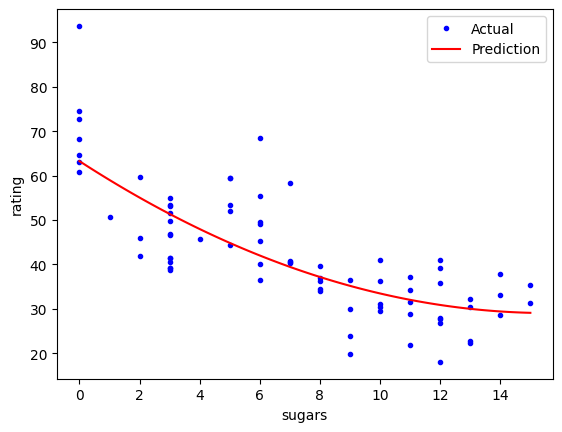

In [ ]:
x_new = np.linspace(0,15,100).reshape(100,1)
x_new_poly = poly_reg.transform(x_new)
y_new=reg.predict(x_new_poly)

plt.plot(x,y,'b.',label='Actual')
plt.plot(x_new,y_new,'r-',label='Prediction')
plt.legend(loc='upper right')
plt.xlabel('sugars')
plt.ylabel('rating')
plt.show()